**HR Analytics Project - Using Logistic Regression**

**Objective**
1) Understanding what could be major cause of attrition of employees.
2) Building Logistic Regression Model for Predicting Employee Risk of Leaving based on different paramenters like satisfaction, monthly hours, promotion & last evaluation details.el

**Exploratory Data Analysis**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

Importing Data Frame 

In [176]:
df = pd.read_csv(r"C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\HR_comma_sep_LogisticRegression_BinaryClassification.csv")
df.head()
df1 = df.drop(df[["Department", "salary"]], axis = 'columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Verification of data frame features / columns of information

In [178]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Pair Plot Distribution of continuous features to understand the attrition major reason.

<Figure size 1200x1200 with 0 Axes>

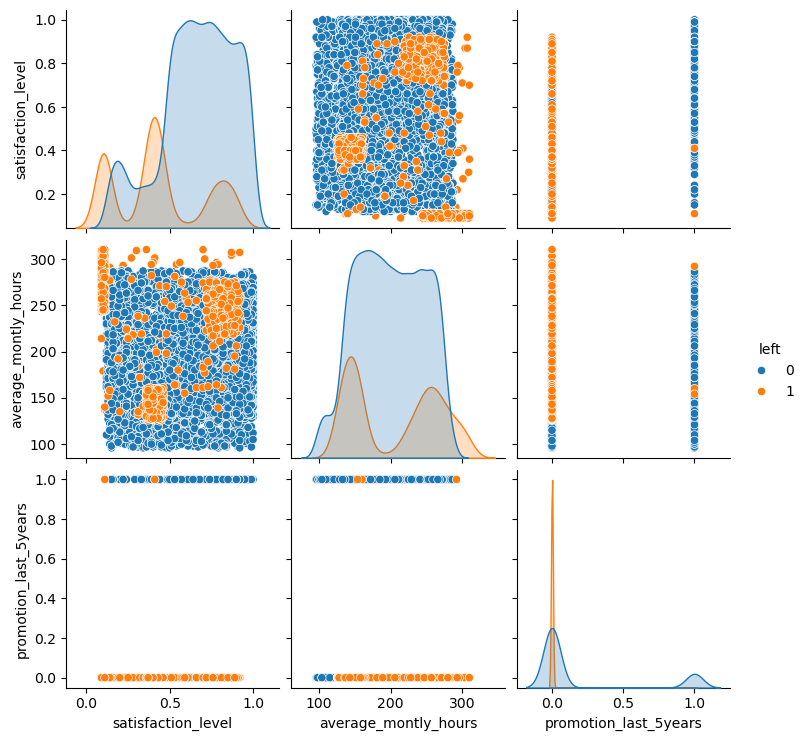

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

# Include only numeric columns in the pairplot
sns.pairplot(df, 
             vars=['satisfaction_level',
                   'average_montly_hours',  
                   'promotion_last_5years'], 
             hue='left' )

# Display the plot
plt.show()

Image 01: Satisfaction
Most of the employees, who left can be seen as less satisfied and retained employees, can be seen as satisfied.

Image 02: Working Hours
Employees who tend to work more working hours & satisfaction levels seems to be leaving the organization.

Image 03: Promotion
Employees, who left the organization seems most of them, did not have any promotion history.

Image 05:
Slight, employee population, who left seems to be worked for more working hours, however, working hours may not be major issue. As it is very less area.

Image 06:
Most of the retained employees, have the promotion history.

Summary:
The Major issue, seems to be the working hours and employee's dissatisfaction for the extra working hours.

Separating the Left Employees Data

In [183]:
left = df1[df1.left==1]
left.shape

(3571, 8)

Separating Retained Employees Data

In [185]:
retained = df1[df1.left==0]
retained.shape

(11428, 8)

**Descriptive Statistics**

In [187]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.187784
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.001120


**From Above, we can conclude as follows:**

1) Employee Satisfaction seems to be low for employees who left with (0.44), when, compared with the employees who got retained (0.66)
2) Average Monthly hours are more for left employees compared with retained employees (199 Vs 207)
3) Employees who are given with promotion are likely to retain in the organization

**Impact of Salary on Employee Retention**

In [191]:
salary_left_table = pd.crosstab(df.salary, df.left)
salary_left_table

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

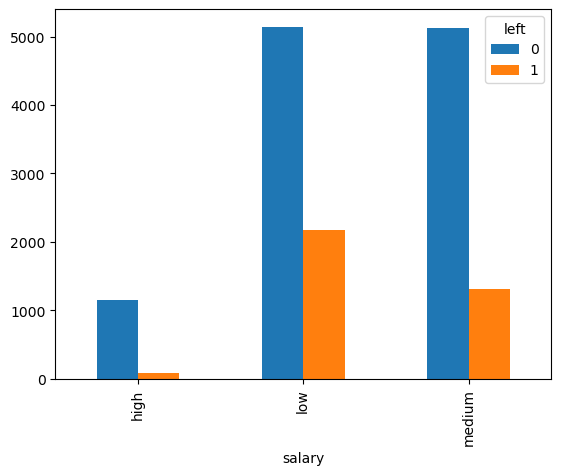

In [192]:
salary_left_table.plot(kind = 'bar')

Above Barchart shows, high salried employees are not likely to leave the organization

**Department wise Employee Retention**

In [195]:
department_left_table = pd.crosstab(df.Department, df.left)
department_left_table

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='Department'>

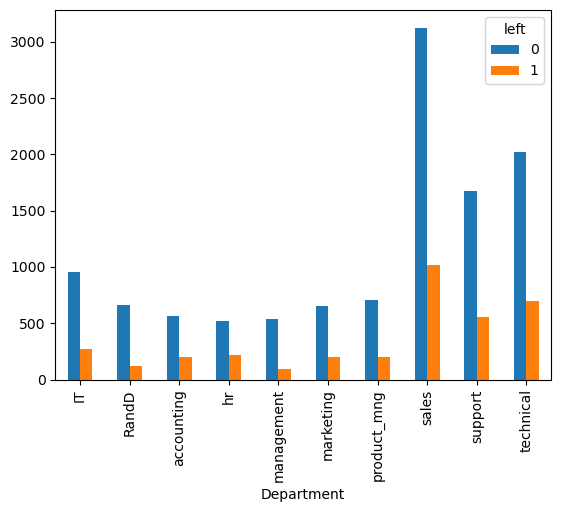

In [196]:
department_left_table.plot(kind='bar')

From above chart there seems to be some impact on employee retention but it is not major, hence, we will ignore department from our analysis

**From above analysis, we can use following variables in our analysis**

1) Satisfaction Level
2) Average Monthly Hours
3) Promotion Last 5 Years
4) Salary

In [200]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


Adding Dummies to Salry column, as it consists of the text

In [383]:
subdf_dummies = pd.get_dummies(subdf.salary, prefix = 'salary')
subdf_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [384]:
df_with_dummies = pd.concat([subdf, subdf_dummies], axis = 'columns' )
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [385]:
df_with_dummies1 = df_with_dummies.drop(['salary', 'salary_low'], axis = 'columns')
df_with_dummies1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,False,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,False,False
4,0.37,159,0,False,False
...,...,...,...,...,...
14994,0.40,151,0,False,False
14995,0.37,160,0,False,False
14996,0.37,143,0,False,False
14997,0.11,280,0,False,False


**Relation between satisfaction level and left**

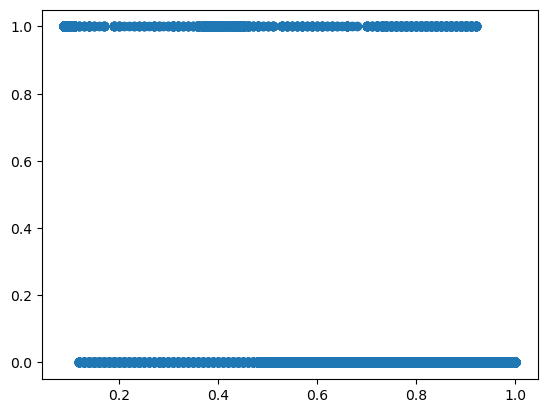

In [387]:
plt.scatter(df.satisfaction_level, df.left)
plt.show()

**Relation between Left and extra working hours**

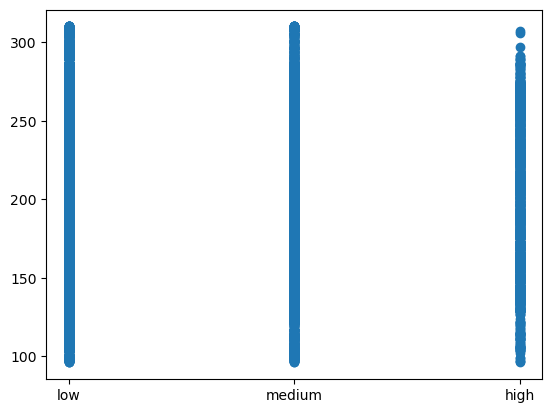

In [389]:
plt.scatter (df.salary, df.average_montly_hours)

**Relationship between promotion_last_5years and left**

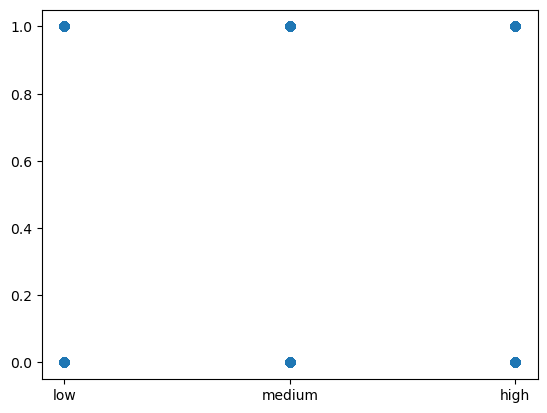

In [391]:
plt.scatter(df.salary, df.promotion_last_5years)

In [392]:
X = df_with_dummies1

In [393]:
y = df.left

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [395]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
3827,0.60,229,0,False,False
12491,0.39,151,0,False,True
1352,0.74,248,0,False,True
7731,0.73,181,0,False,False
7799,0.17,274,0,False,True
...,...,...,...,...,...
12614,0.09,296,0,False,True
14751,0.45,129,0,True,False
1087,0.73,273,0,False,False
494,0.84,218,0,False,True


In [396]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [397]:
model.fit(X_train, y_train)

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [398]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [399]:
print(model.score(X_test, y_test))

0.781


In [400]:
#With Job Satisfaction 0.3, average working hours 200 and low salary rate.
model.predict([[0.3, 200, 0, 0, 0]])

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [401]:
model.predict([[0.99, 150, 1, 1, 0]])

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [402]:
#Loading GenAI employees List
genai = pd.read_csv(r'C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\GenAI_Employees.csv')
genai.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.93,0.53,5,198,3,0,1,sales,low
1,0.94,0.83,2,185,3,1,1,technical,medium
2,1.00,0.74,3,220,4,0,1,technical,low
3,0.98,0.92,4,201,3,1,1,support,high
4,0.93,0.75,5,143,3,0,1,support,low


In [403]:
genai = genai[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
genai

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.93,198,1,low
1,0.94,185,1,medium
2,1.00,220,1,low
3,0.98,201,1,high
4,0.93,143,1,low
5,1.00,161,1,low
6,0.98,255,1,high
7,0.93,200,1,low
8,0.38,157,0,low
9,0.80,262,0,medium


In [404]:
genai_dummies = pd.get_dummies(genai.salary, prefix = 'salary')
genai_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,True,False
3,True,False,False
4,False,True,False
5,False,True,False
6,True,False,False
7,False,True,False
8,False,True,False
9,False,False,True


In [405]:
genai_with_dummies = pd.concat([genai, genai_dummies], axis = 'columns' )
genai_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.93,198,1,low,False,True,False
1,0.94,185,1,medium,False,False,True
2,1.00,220,1,low,False,True,False
3,0.98,201,1,high,True,False,False
4,0.93,143,1,low,False,True,False
5,1.00,161,1,low,False,True,False
6,0.98,255,1,high,True,False,False
7,0.93,200,1,low,False,True,False
8,0.38,157,0,low,False,True,False
9,0.80,262,0,medium,False,False,True


In [406]:
genai_with_dummies = genai_with_dummies[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high', 'salary_medium']]
genai_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.93,198,1,False,False
1,0.94,185,1,False,True
2,1.00,220,1,False,False
3,0.98,201,1,True,False
4,0.93,143,1,False,False
5,1.00,161,1,False,False
6,0.98,255,1,True,False
7,0.93,200,1,False,False
8,0.38,157,0,False,False
9,0.80,262,0,False,True


In [407]:
output1 = model.predict(genai_with_dummies)
output1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [408]:
import pandas as pd


predictions_df = pd.DataFrame(output1, columns=['Attrition_Risk_Prediction'])


genai1 = pd.concat([genai, predictions_df], axis=1)

genai1


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Attrition_Risk_Prediction
0,0.93,198,1,low,0
1,0.94,185,1,medium,0
2,1.00,220,1,low,0
3,0.98,201,1,high,0
4,0.93,143,1,low,0
5,1.00,161,1,low,0
6,0.98,255,1,high,0
7,0.93,200,1,low,0
8,0.38,157,0,low,0
9,0.80,262,0,medium,0


In [409]:
# Remove the 'Attrition_Risk' column (if it exists)
genai_with_dummies = genai_with_dummies.drop('Attrition_Risk', axis=1)

# Now make predictions
predictions = model.predict(genai_with_dummies)

# Add the predictions as a new column
genai_with_dummies['Attrition_Risk'] = predictions


KeyError: "['Attrition_Risk'] not found in axis"

In [ ]:
genai_with_dummies = genai_with_dummies[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'Attrition_Risk']]
genai_with_dummies